In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score,classification_report, RocCurveDisplay, plot_roc_curve
import xgboost as xgb
import lightgbm as lgbm
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


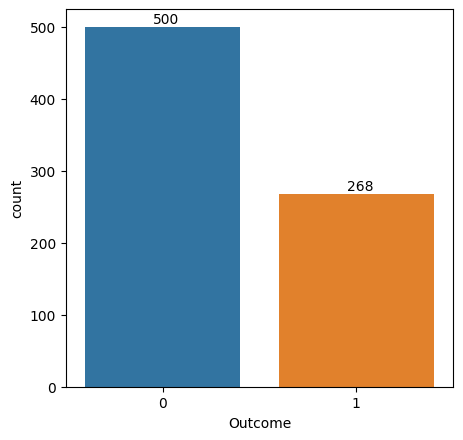

In [6]:

plt.figure(figsize=(5,5),dpi=100)
ax = sns.countplot(data=df,x='Outcome')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+5))

In [7]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<AxesSubplot:>

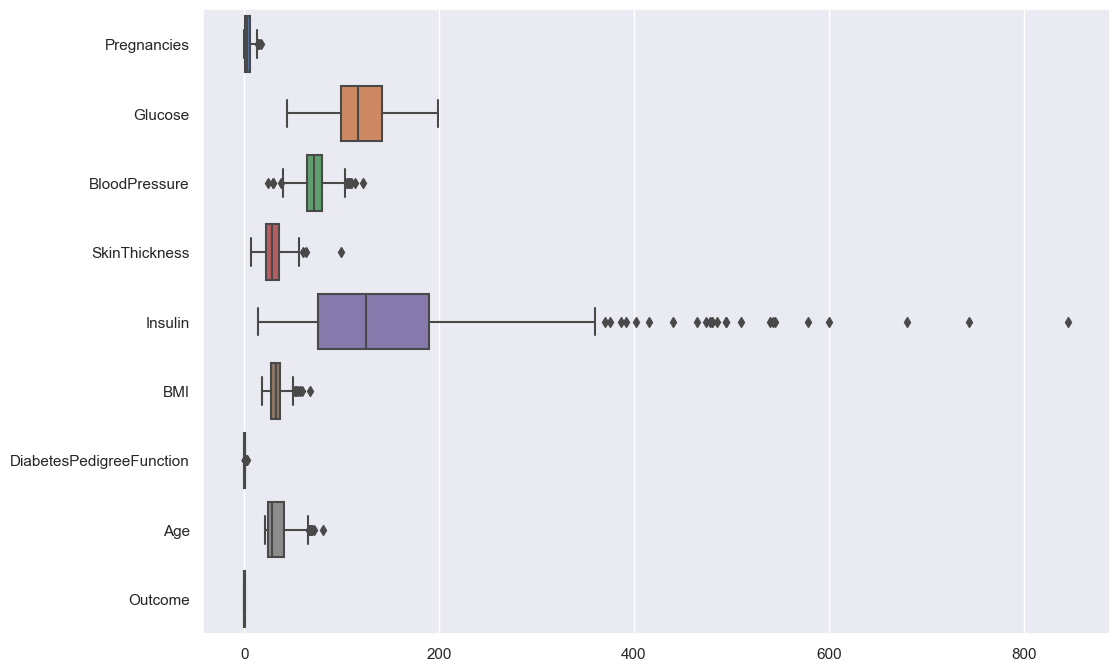

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27),'figure.dpi':100})
sns.boxplot(data=df,orient="h")

<AxesSubplot:>

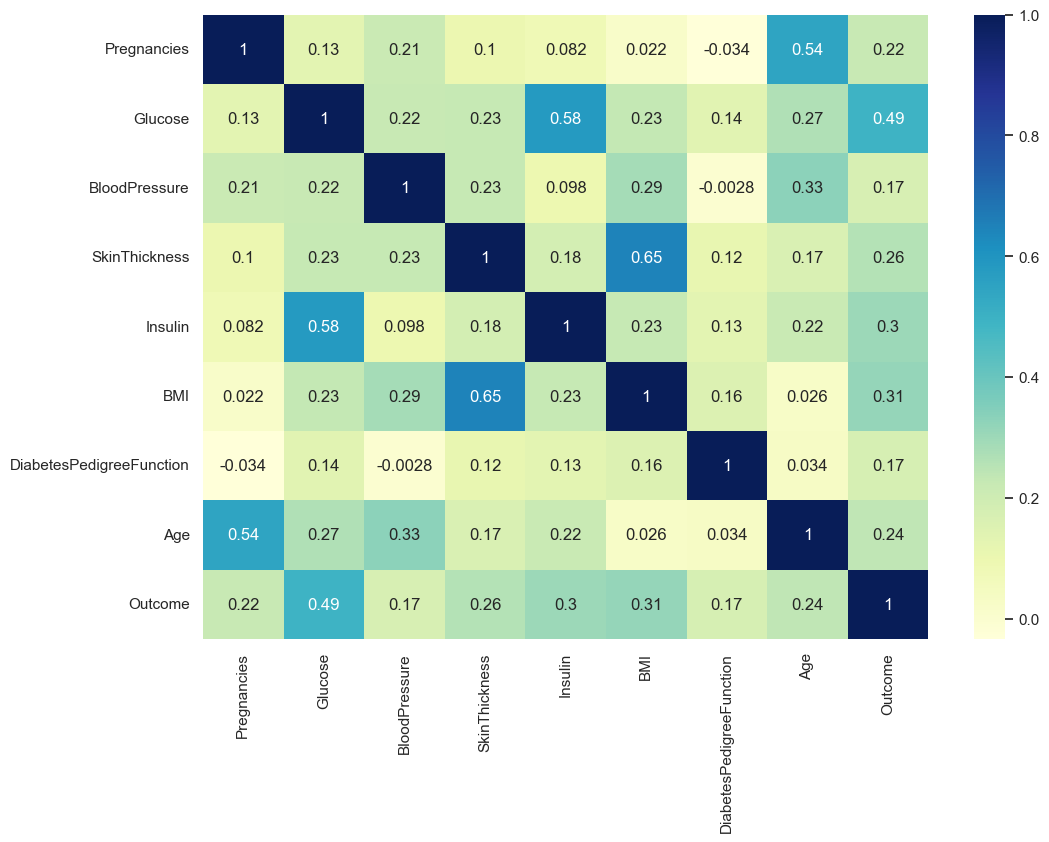

In [10]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [11]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

### Glucose


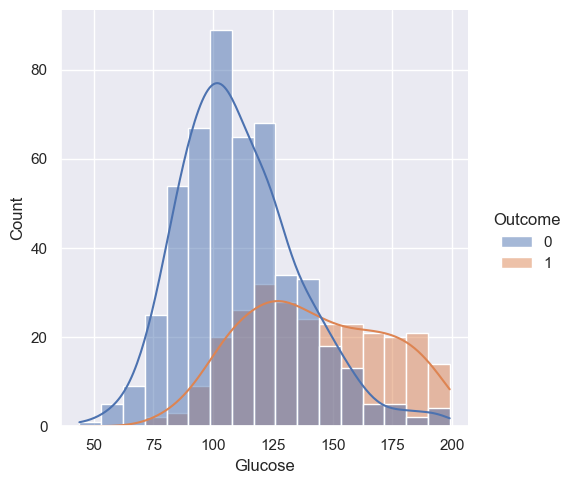

In [12]:
sns.displot(data=df,x='Glucose',hue='Outcome',kde=True)

In [13]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [14]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

### Blood pressure

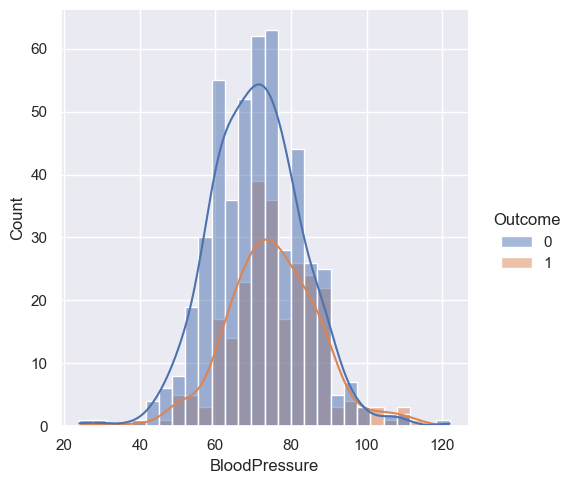

In [15]:
sns.displot(data=df,x='BloodPressure',hue='Outcome',kde=True)

In [16]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [17]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

### SkinThickness

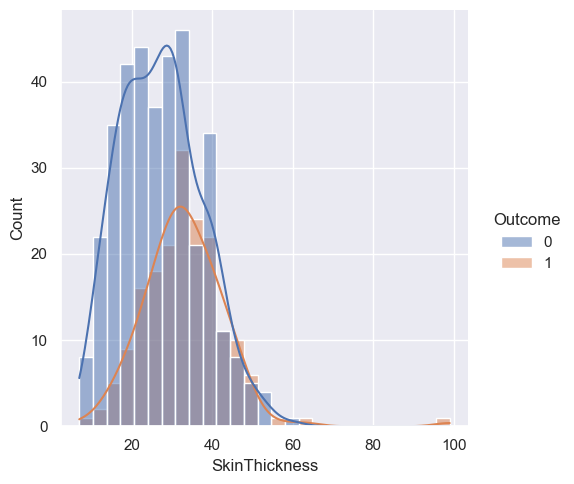

In [18]:
sns.displot(data=df,x='SkinThickness',hue='Outcome',kde=True)

In [19]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [20]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

### Insulin

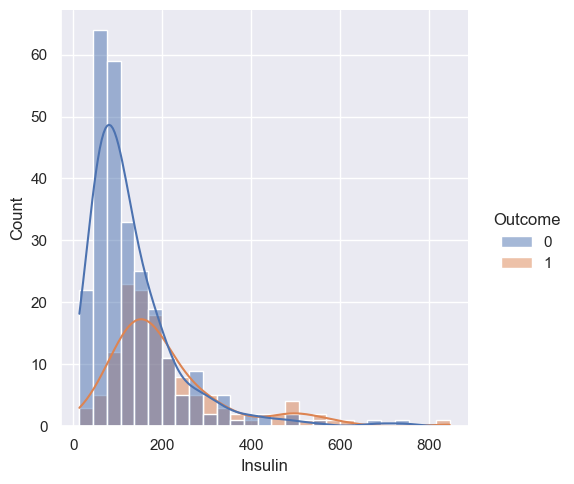

In [21]:
sns.displot(data=df,x='Insulin',hue='Outcome',kde='True')

In [22]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [23]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

### BMI

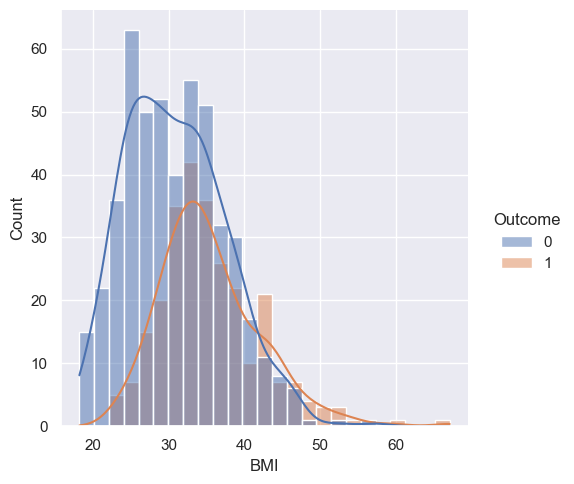

In [24]:
sns.displot(data=df,x='BMI',kde=True,hue='Outcome')

In [25]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [26]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [28]:
data = df

<Figure size 3510x2481 with 0 Axes>

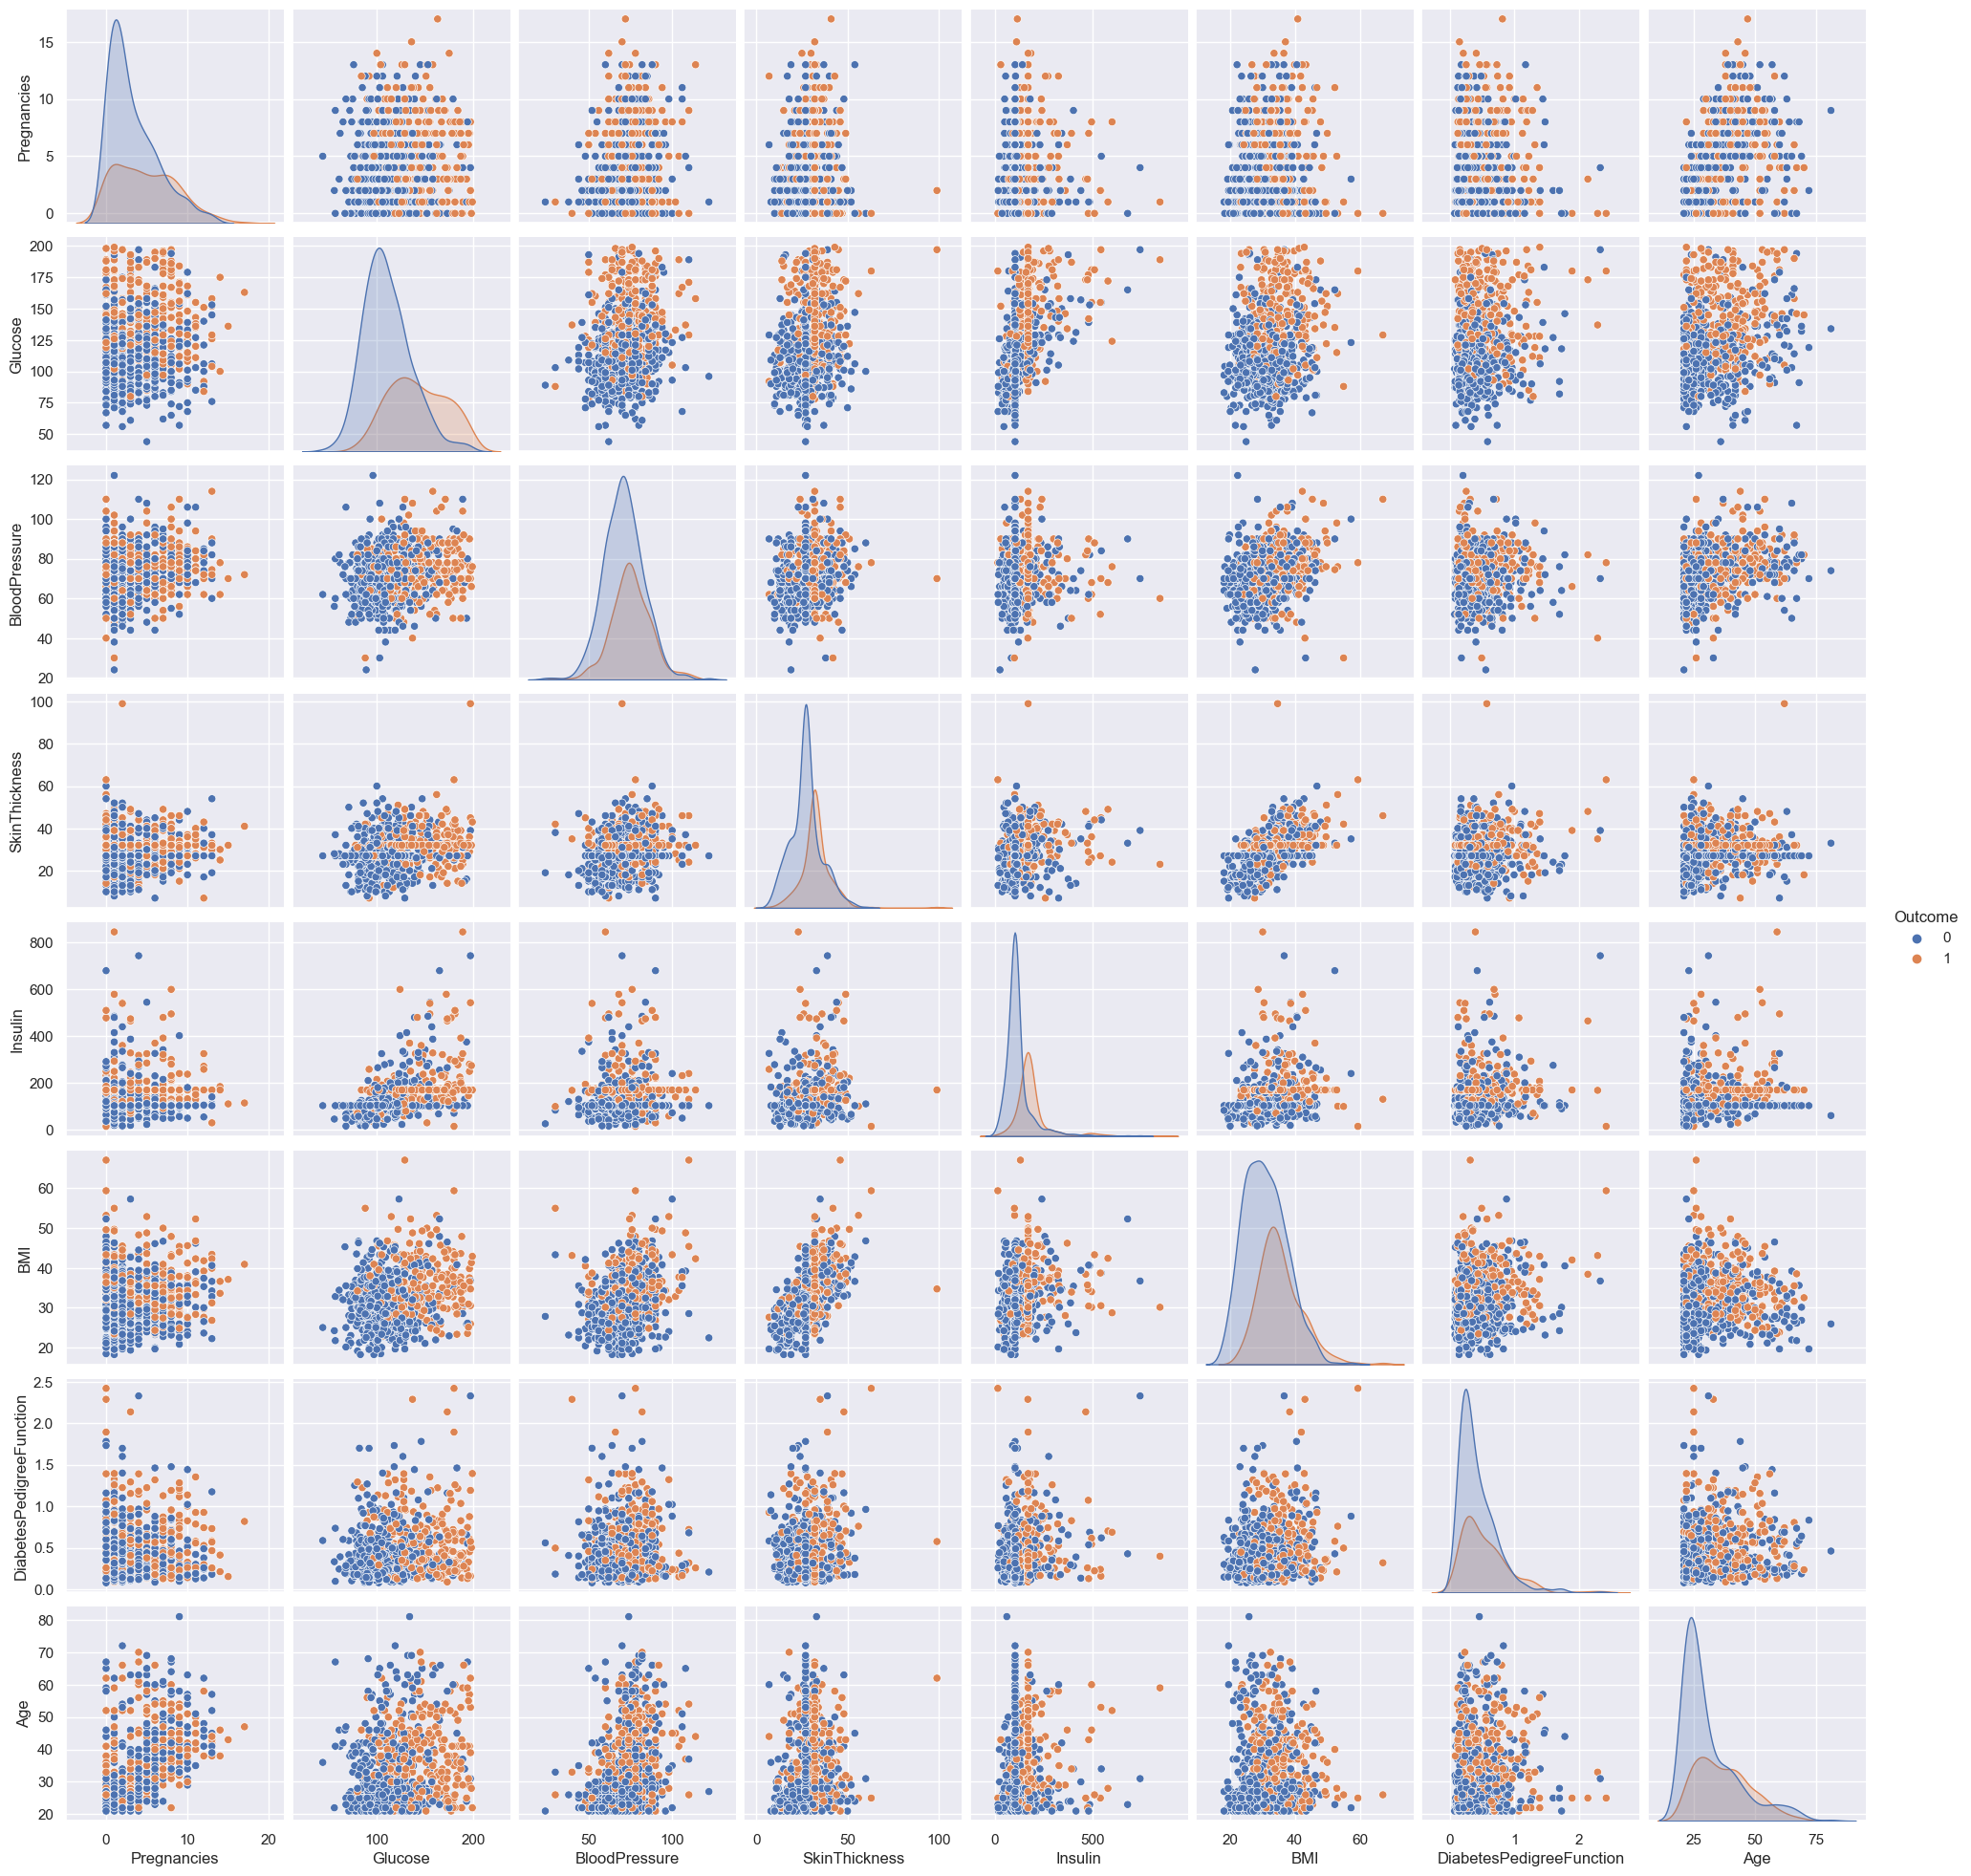

In [29]:
plt.figure(dpi=300)
sns.pairplot(data=data,hue='Outcome')

<AxesSubplot:>

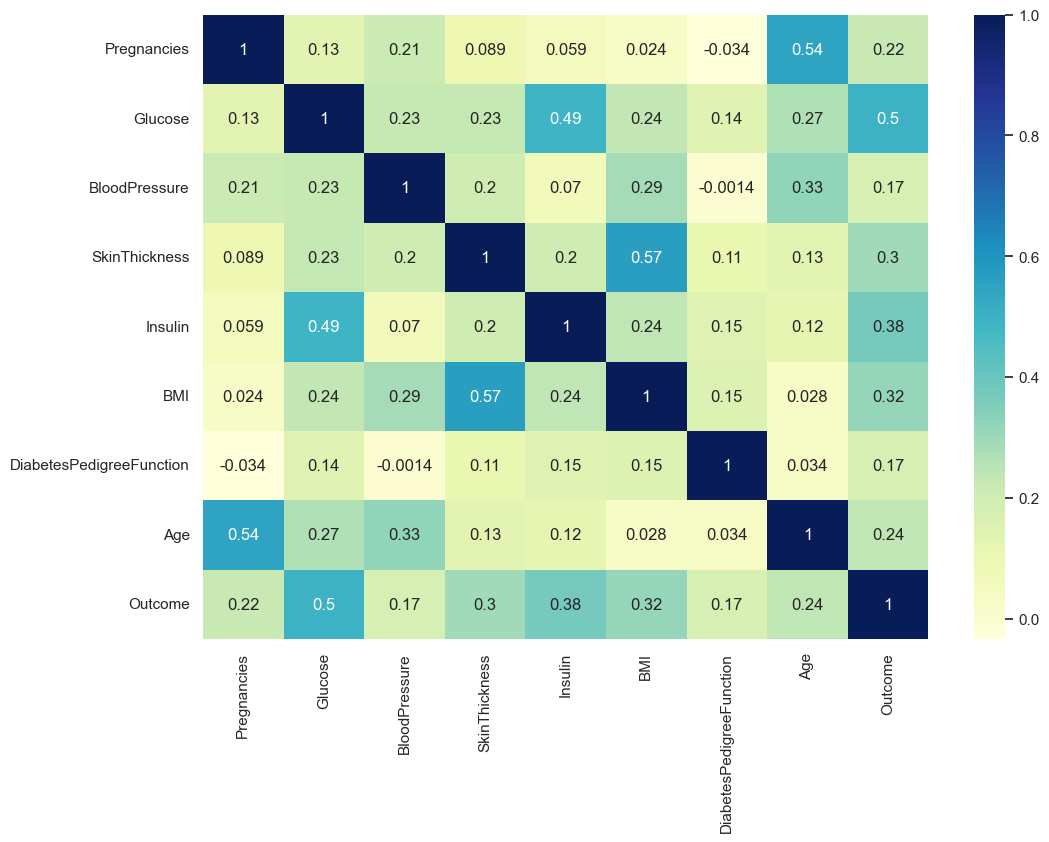

In [30]:
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

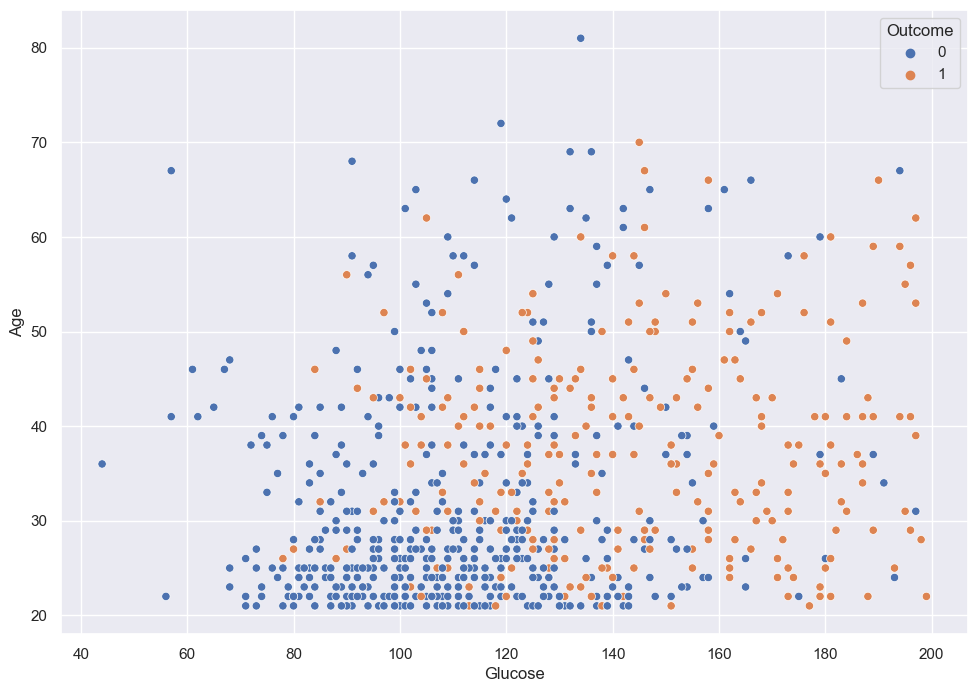

In [31]:
sns.scatterplot(x='Glucose',y='Age',hue='Outcome',data=data)

In [32]:
data.loc[(data['Age']<=29) & (data['Glucose']<=117)]['Outcome'].value_counts()

0    223
1     19
Name: Outcome, dtype: int64

In [33]:
data.loc[(data['Age']>30) & (data['Age']<48) & (data['Glucose']<=89)]['Outcome'].value_counts()

0    29
1     2
Name: Outcome, dtype: int64

In [34]:
data.loc[(data['Age']>=59) & (data['Age']<85) & (data['Glucose']<=144)]['Outcome'].value_counts()

0    18
1     2
Name: Outcome, dtype: int64

In [35]:
#N1 - Age vs Glucose
data.loc[:,'N1']= 1
data.loc[(data['Age']<=29) & (data['Glucose']<=117),'N1'] = 0
data.loc[(data['Age']>30) & (data['Age']<48) & (data['Glucose']<=89),'N1']= 0
data.loc[(data['Age']>=59) & (data['Age']<85) & (data['Glucose']<=144),'N1'] = 0

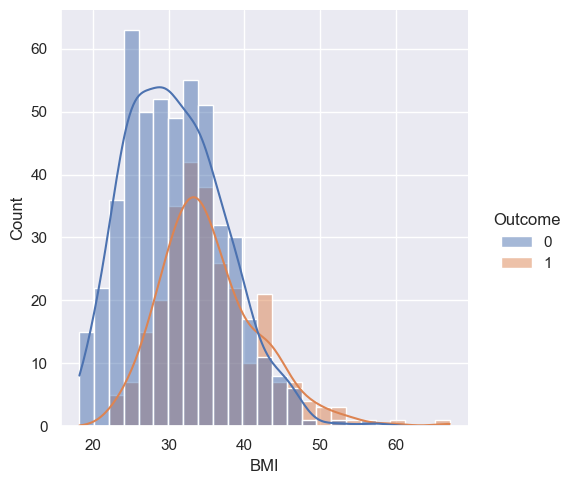

In [36]:
sns.displot(data=data,x='BMI',hue='Outcome',kde=True)

In [37]:
data.loc[data.BMI<=27]['Outcome'].value_counts()

0    157
1     17
Name: Outcome, dtype: int64

In [38]:
#N2 - BMI
data.loc[:,'N2']=1
data.loc[(data['BMI']<=27),'N2']=0

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

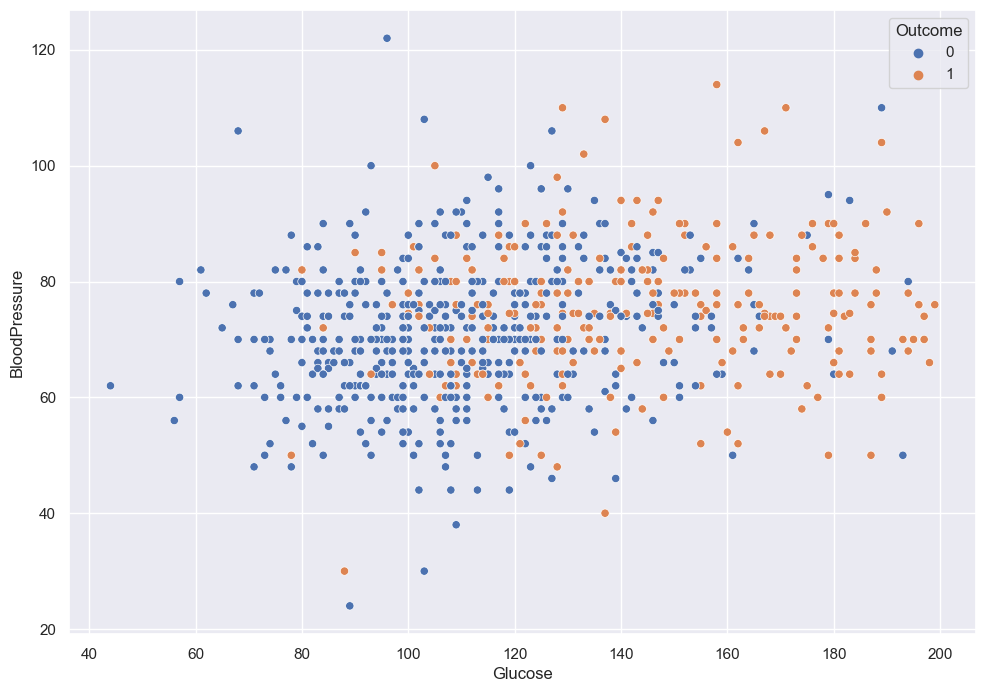

In [39]:
sns.scatterplot(x='Glucose',y='BloodPressure',data=data,hue='Outcome')

In [40]:
data.loc[(data['Glucose']<=105) & (data['BloodPressure']>=87)]['Outcome'].value_counts()

0    12
1     1
Name: Outcome, dtype: int64

In [41]:
data.loc[:,'N3']=1
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'N3']=0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']>=87),'N3']=0

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

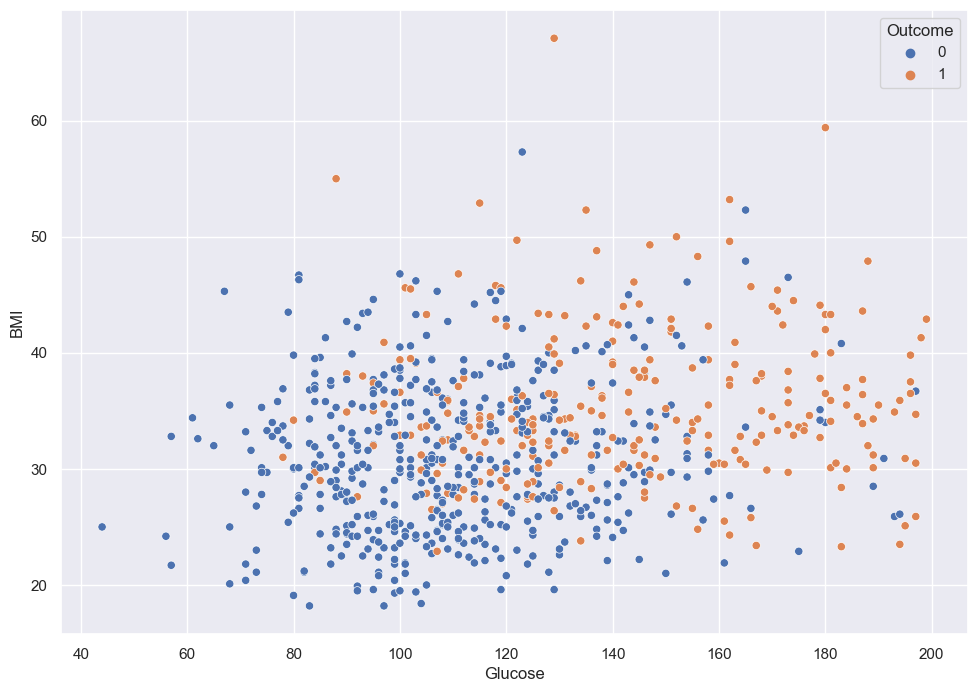

In [42]:
sns.scatterplot(data=data,x='Glucose',y='BMI',hue='Outcome')

In [43]:
data.loc[(data['Glucose']<=150) & (data['BMI']<=26)]['Outcome'].value_counts()

0    132
1      3
Name: Outcome, dtype: int64

In [44]:
data.loc[:,'N4']=1
data.loc[(data['Glucose']<=150) & (data['BMI']<=25),'N4']=0
data.loc[(data['Glucose']<=105) & (data['BMI']<=31),'N4']=0

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

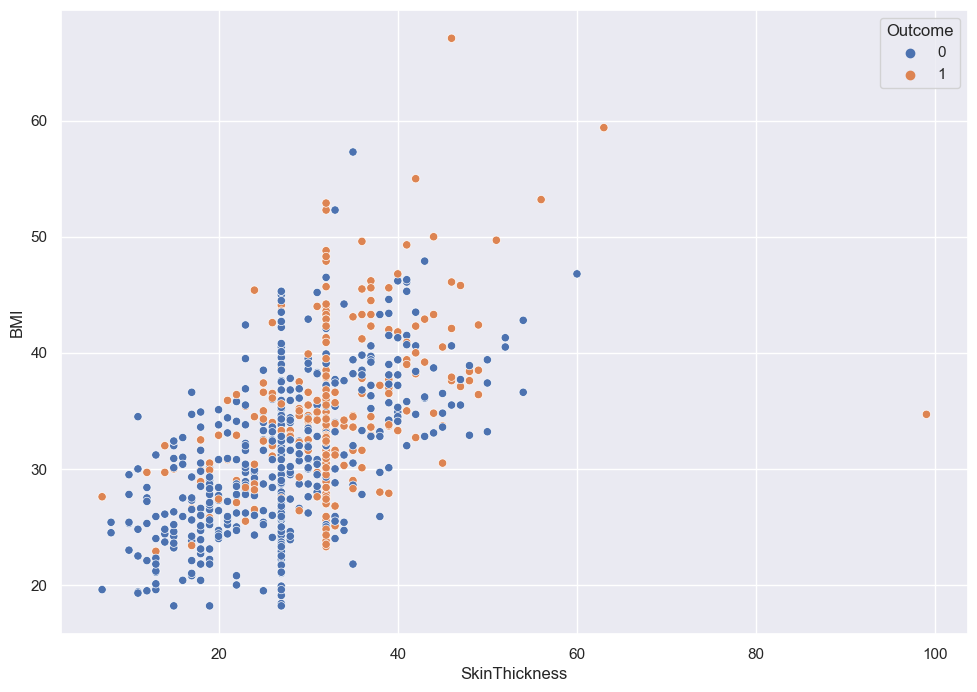

In [45]:
sns.scatterplot(data=data,x='SkinThickness',y='BMI',hue='Outcome')

In [46]:
data.loc[(data['BMI']<=40) & (data['SkinThickness']<=16)]['Outcome'].value_counts()

0    53
1     6
Name: Outcome, dtype: int64

In [47]:
data.loc[:,'N5']= 1
data.loc[(data['BMI']<=27) & (data['SkinThickness']<=28),'N5'] = 0
data.loc[(data['BMI']<=40) & (data['SkinThickness']<=16),'N5'] = 0

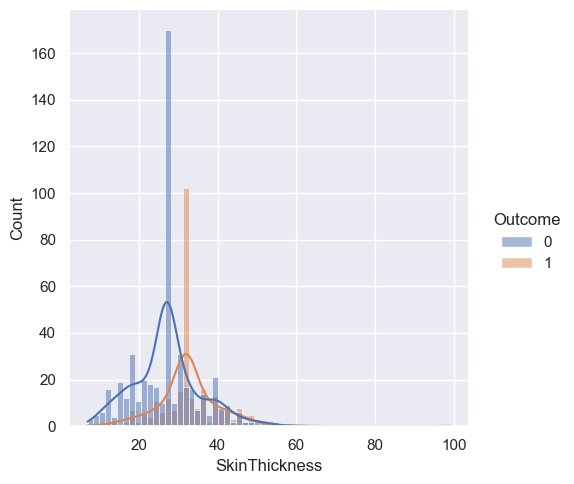

In [48]:
sns.displot(x='SkinThickness',data=data,hue='Outcome',kde=True)

In [49]:
data.loc[(data['SkinThickness']<=25)]['Outcome'].value_counts()

0    162
1     38
Name: Outcome, dtype: int64

In [50]:
data.loc[:,'N6']=1
data.loc[(data['SkinThickness']<=25) ,'N6']=0

In [51]:
data['N6'].value_counts()

1    568
0    200
Name: N6, dtype: int64

<AxesSubplot:xlabel='Glucose', ylabel='SkinThickness'>

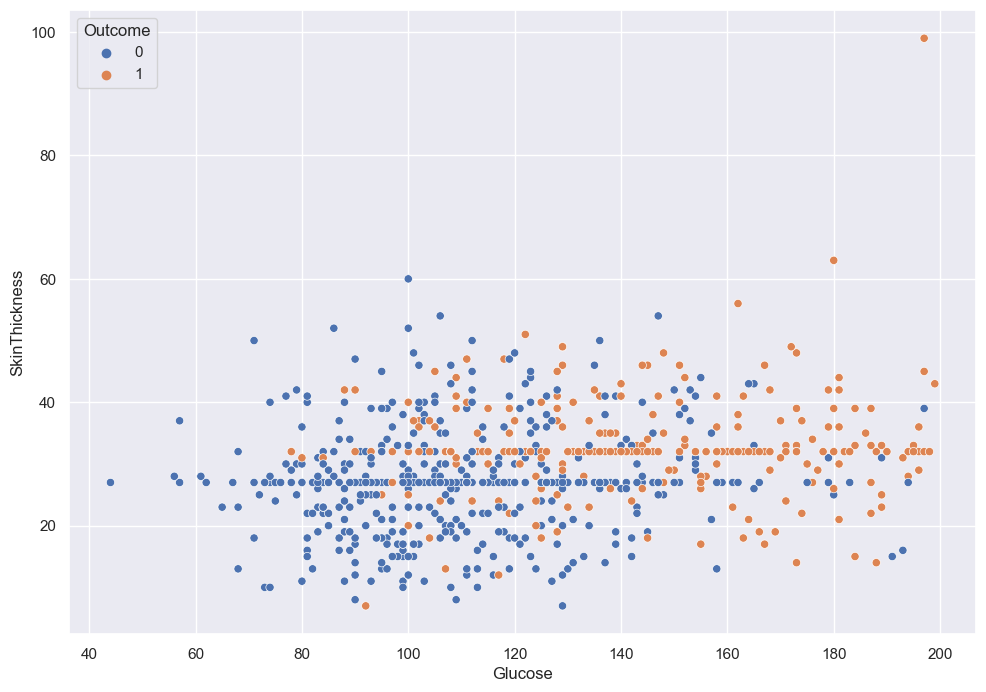

In [52]:
sns.scatterplot(x='Glucose',y='SkinThickness',data=data,hue='Outcome')

In [53]:
data.loc[(data['Glucose']<=90) & (data['SkinThickness']<=80)]['Outcome'].value_counts()

0    103
1      7
Name: Outcome, dtype: int64

In [54]:
data.loc[:,'N7']= 1
data.loc[(data['Glucose']<=90) & (data['SkinThickness']<=30),'N7'] = 0
data.loc[(data['Glucose']<=90) & (data['SkinThickness']<=80),'N7'] = 0

<AxesSubplot:xlabel='BMI', ylabel='Age'>

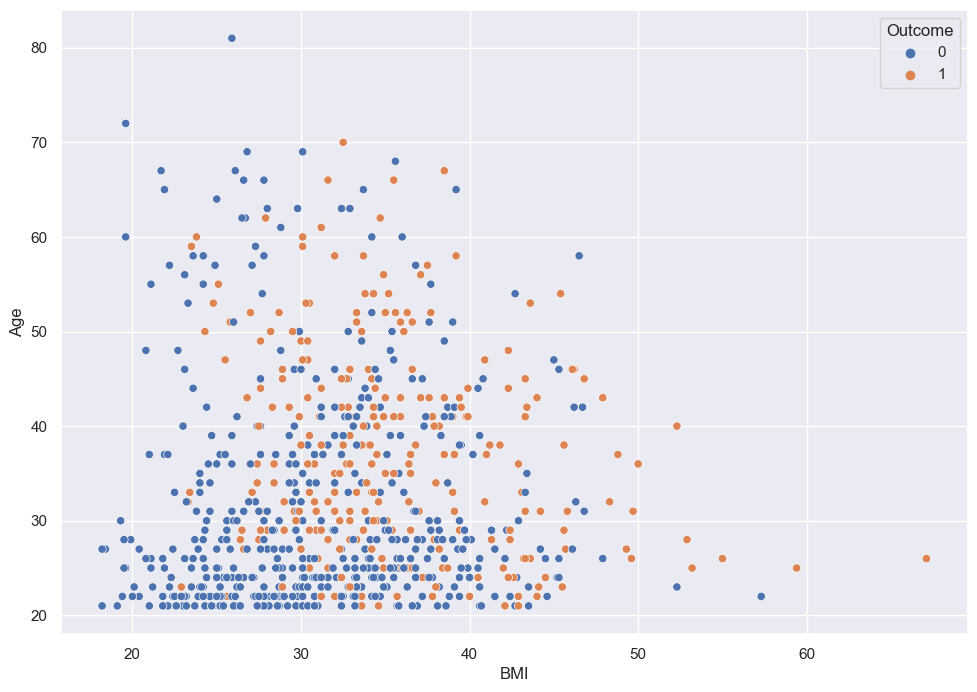

In [55]:
sns.scatterplot(x='BMI',y='Age',data=data,hue='Outcome')

In [56]:
data.loc[(data['BMI']<=29) & (data['Age']<=27)]['Outcome'].value_counts()

0    131
1      5
Name: Outcome, dtype: int64

In [57]:
data.loc[:,'N8']= 1
data.loc[(data['BMI']<=25) & (data['Age']<=100),'N8'] = 0
data.loc[(data['BMI']<=29) & (data['Age']<=27),'N8'] = 0

In [58]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,N1,N2,N3,N4,N5,N6,N7,N8
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,1,1,1,1,1,1,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,0,1,1,0,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1,0,1,1,1,1,1,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,1,0,0,1,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,0,1,0,1,1,1,1,1
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,1,1,1,1,1,1,1,1
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,1,0,1,1,0,0,1,1
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,1,1,1,1,1,1,1,1


In [59]:
data['N0'] = data['BMI'] * data['SkinThickness']

data['N9'] =  data['Pregnancies'] / data['Age']

data['N10'] = data['Glucose'] / data['DiabetesPedigreeFunction']

data['N11'] = data['Age'] * data['DiabetesPedigreeFunction']

data['N12'] = data['Age'] / data['Insulin']

In [60]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,N1,...,N4,N5,N6,N7,N8,N0,N9,N10,N11,N12
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,...,1,1,1,1,1,1176.0,0.120000,236.044657,31.350,0.294985
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,...,0,1,1,0,1,771.4,0.032258,242.165242,10.881,0.302439
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1,...,1,1,1,1,0,745.6,0.250000,272.321429,21.504,0.188791
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,...,0,1,0,0,0,646.3,0.047619,532.934132,3.507,0.223404
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1,...,1,1,1,1,1,1508.5,0.000000,59.877622,75.504,0.196429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,0,...,1,1,1,1,1,1579.2,0.158730,590.643275,10.773,0.350000
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,1,...,1,1,1,1,1,993.6,0.074074,358.823529,9.180,0.263415
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,1,...,1,0,0,1,1,602.6,0.166667,493.877551,7.350,0.267857
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,1,...,1,1,1,1,1,963.2,0.021277,361.031519,16.403,0.277286


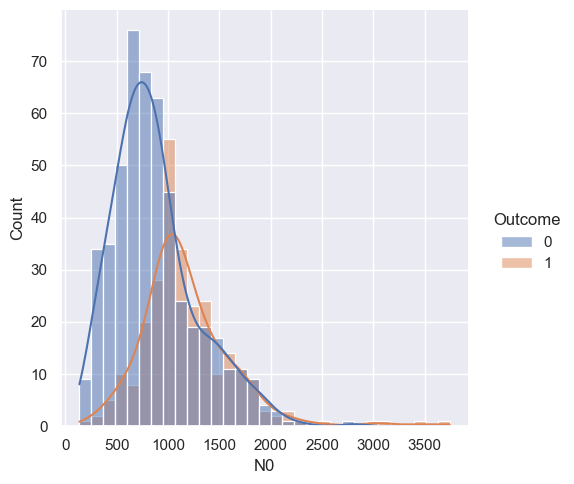

In [61]:
sns.displot(data=data,x='N0',kde=True,hue='Outcome')

In [62]:
data.loc[(data['N0']<650)]['Outcome'].value_counts() 

0    161
1     21
Name: Outcome, dtype: int64

In [63]:
data.loc[:,'N13']=1
data.loc[(data['N0']<650) ,'N13']=0

In [64]:
data = data[['Outcome', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N13',
       'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'N0', 'N9', 'N10', 'N11',
       'N12']]

In [65]:
#data.to_csv('diabetes_mod.csv',index=False)

In [66]:
# target_col = ["Outcome"]
# cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
# cat_cols   = [x for x in cat_cols ]
# #numerical columns
# num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
# #Binary columns with 2 values
# bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
# #Columns more than 2 values
# multi_cols = [i for i in cat_cols if i not in bin_cols]

# #Label encoding Binary columns
# le = LabelEncoder()
# for i in bin_cols :
#     data[i] = le.fit_transform(data[i])
    
# #Duplicating columns for multi value columns
# data = pd.get_dummies(data = data,columns = multi_cols )

# #Scaling Numerical columns
# std = StandardScaler()
# scaled = std.fit_transform(data[num_cols])
# scaled = pd.DataFrame(scaled,columns=num_cols)

# #dropping original values merging scaled values for numerical columns
# df_data_og = data.copy()
# data = data.drop(columns = num_cols,axis = 1)
# data = data.merge(scaled,left_index=True,right_index=True,how = "left")


In [67]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

SMOTE

_________________________________________________________________________________________________________________________________________________________________________________________________________

In [69]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)

In [70]:
resampled_df = pd.concat([X_resampled,y_resampled],axis=1)

In [71]:
resampled_df['Outcome'].value_counts()

0    401
1    401
Name: Outcome, dtype: int64

In [72]:
X1 = resampled_df.drop('Outcome', axis=1)
y1 = resampled_df['Outcome']

__________________________________________

In [73]:
from lazypredict.Supervised import LazyClassifier
lazy_clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,prediction = lazy_clf.fit(X_train,X_test,y_train,y_test)
print(models)

100%|██████████| 29/29 [00:01<00:00, 26.61it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.88               0.88     0.88      0.88   
LGBMClassifier                     0.88               0.87     0.87      0.88   
DecisionTreeClassifier             0.86               0.87     0.87      0.87   
BaggingClassifier                  0.87               0.86     0.86      0.87   
XGBClassifier                      0.87               0.86     0.86      0.87   
SVC                                0.86               0.85     0.85      0.86   
NuSVC                              0.86               0.85     0.85      0.86   
ExtraTreesClassifier               0.86               0.85     0.85      0.86   
AdaBoostClassifier                 0.85               0.84     0.84      0.85   
Perceptron                         0.83               0.83     0.83      0.83   
BernoulliNB                 

### Random Forest

______________________________________________________________________

In [74]:
rf = RandomForestClassifier(max_depth=5,n_estimators=100,random_state=42,oob_score=True)
rf.fit(X_train,y_train)
print(accuracy_score(rf.predict(X_test),y_test))
print(confusion_matrix(rf.predict(X_test),y_test))
print(classification_report(rf.predict(X_test),y_test))


0.8961038961038961
[[89  6]
 [10 49]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.89      0.83      0.86        59

    accuracy                           0.90       154
   macro avg       0.89      0.88      0.89       154
weighted avg       0.90      0.90      0.90       154



### XGB
_____________________________________________________________________________________________

In [75]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [76]:
print(accuracy_score(model.predict(X_test),y_test))
print(confusion_matrix(model.predict(X_test),y_test))
print(classification_report(model.predict(X_test),y_test))

0.8701298701298701
[[89 10]
 [10 45]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        99
           1       0.82      0.82      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



In [77]:
# hp tuning

estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=6,
    seed=42
)

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000],
              'gamma': [0.5, 1, 1.5, 2, 5],
              'min_child_weight': [1,5,10],
              'subsample': [0.6,0.8,1.0], 
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 9],
              'colsample_bytree': [0.6,0.8,1.0],
              'alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}


random_search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_test,
    n_iter = 300,
    scoring = 'accuracy',
    n_jobs = 6,
    cv = 5,
    verbose=True,
    random_state = 42
)

random_search.fit(X_train, y_train)
opt_parameters_1 =  random_search.best_params_
print(opt_parameters_1)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
{'subsample': 1.0, 'n_estimators': 400, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.05, 'lambda': 0.1, 'gamma': 2, 'colsample_bytree': 1.0, 'alpha': 1}


In [78]:
print(random_search.best_score_)

0.9039584166333468


In [79]:
xgb_clf = xgb.XGBClassifier(**opt_parameters_1)
xgb_clf.fit(X_train,y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', lambda=0.1,
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [80]:
print(accuracy_score(xgb_clf.predict(X_test),y_test))
print(confusion_matrix(xgb_clf.predict(X_test),y_test))
print(classification_report(xgb_clf.predict(X_test),y_test))

0.8701298701298701
[[88  9]
 [11 46]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        97
           1       0.84      0.81      0.82        57

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



### LGBM

_________________________________________________________________________________

In [83]:
random_state=42

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 300

#intialize lgbm and launch the search
lgbm_clf = lgbm.LGBMClassifier(random_state=random_state, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X_train, y_train)
opt_parameters =  grid_search.best_params_
lgbm_clf = lgbm.LGBMClassifier(**opt_parameters)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [84]:
print(opt_parameters)
print(grid_search.best_score_)

{'colsample_bytree': 0.5536409936567944, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_samples': 114, 'min_child_weight': 0.01, 'n_estimators': 800, 'num_leaves': 37, 'reg_alpha': 2, 'reg_lambda': 20, 'subsample': 0.31146516352470055}
0.8876849260295883


### Bagging Decision Tree
_____________________________________________________________________

In [85]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),bootstrap=True,n_jobs = 6, oob_score=True,random_state=42)
bagging.fit(X_train,y_train)

print(accuracy_score(bagging.predict(X_test),y_test))
print(confusion_matrix(bagging.predict(X_test),y_test))
print(classification_report(bagging.predict(X_test),y_test))

0.8701298701298701
[[88  9]
 [11 46]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        97
           1       0.84      0.81      0.82        57

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



### Voting

______________________________________________________________

In [86]:
knn_clf = KNeighborsClassifier(n_neighbors=9)

voting_clf = VotingClassifier(estimators=[ 
    ('lgbm_clf', lgbm_clf),
    ('knn', knn_clf)], voting='soft', weights = [1,1])


voting_clf.fit(X_train,y_train)


VotingClassifier(estimators=[('lgbm_clf',
                              LGBMClassifier(colsample_bytree=0.5536409936567944,
                                             learning_rate=0.3, max_depth=6,
                                             min_child_samples=114,
                                             min_child_weight=0.01,
                                             n_estimators=800, num_leaves=37,
                                             reg_alpha=2, reg_lambda=20,
                                             subsample=0.31146516352470055)),
                             ('knn', KNeighborsClassifier(n_neighbors=9))],
                 voting='soft', weights=[1, 1])

In [100]:
print(accuracy_score(voting_clf.predict(X_test),y_test))
print(roc_auc_score(voting_clf.predict(X_test),y_test))
print(confusion_matrix(voting_clf.predict(X_test),y_test))
print(classification_report(voting_clf.predict(X_test),y_test))

#89.61 with std scaling

0.8831168831168831
0.871043588352324
[[89  8]
 [10 47]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        97
           1       0.85      0.82      0.84        57

    accuracy                           0.88       154
   macro avg       0.88      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154



In [106]:
print("Random Forest :",roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("XGB Classifier :",roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1]))
print("Bagging Classifier :",roc_auc_score(y_test, bagging.predict_proba(X_test)[:,1]))
print("LGBM + KNN :",roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:,1]))


Random Forest : 0.9346189164370983
XGB Classifier : 0.9450872359963269
Bagging Classifier : 0.9184573002754821
LGBM + KNN : 0.9265381083562901


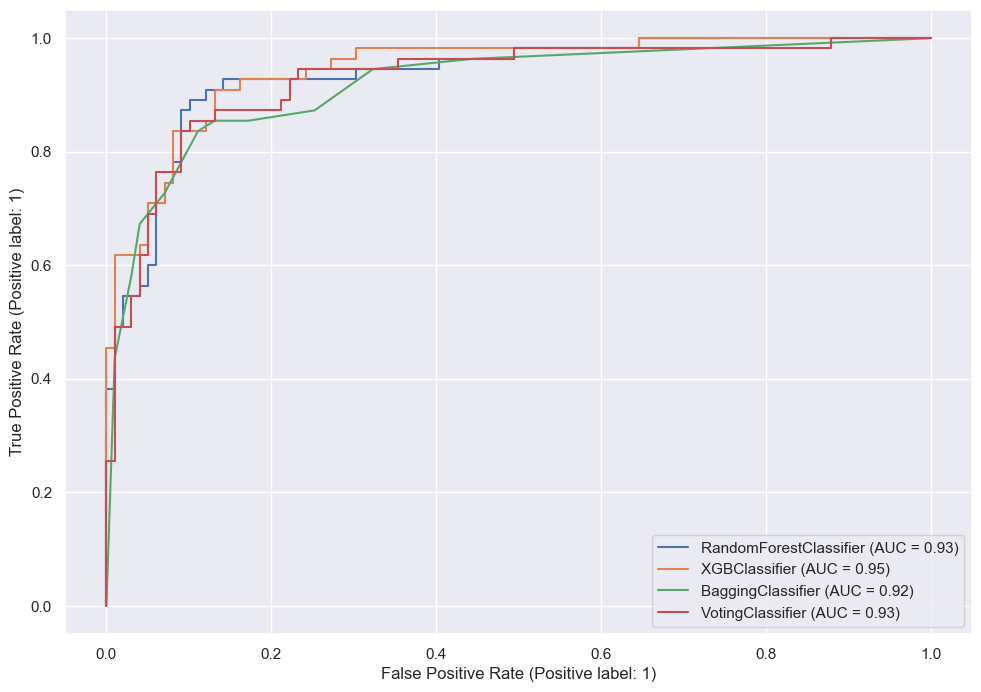

In [96]:
disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)
plot_roc_curve(xgb_clf,X_test,y_test, ax = disp.ax_);
plot_roc_curve(bagging,X_test,y_test, ax = disp.ax_);
plot_roc_curve(voting_clf,X_test,y_test, ax = disp.ax_);
plt.show()